# Channel Break Out Detection

## Import Data

In [67]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy import stats

In [69]:
#df = pd.read_csv(r"D:\CARLOS\TRADING\EURUSD_Candlestick_1_D_BID_04.05.2003-21.01.2023.csv")
file_path = r'D:\traderxpro\data\df_h.txt'
#df = pd.read_csv(file_path, sep='\t', dtype={'open':float, 'high':float, 'low':float, 'close':float, 'volume':float,'fecha':datetime, 'companyName':str, 'fecha2:':datetime})
df = pd.read_csv(file_path, sep='\t')
df['fecha']=pd.to_datetime(df['fecha'])
df['fecha2']=pd.to_datetime(df['fecha2'])

In [71]:
df=df.rename(columns={"open": "Open", "close": "Close", "high": "High", "low": "Low", "fecha2":"date", "volume":"Volume"})
df.head(10)

,fecha,Open,High,Low,Close,Volume,companyName,date
0,2024-10-16 20:00:00,582.300,582.3000,582.3000,582.300,1502080,SPY,2024-10-16 21:00:00
1,2024-10-16 19:00:00,581.860,581.9000,579.7800,581.580,30881,SPY,2024-10-16 20:00:00
2,2024-10-16 18:00:00,582.000,582.3000,581.7000,581.870,1546066,SPY,2024-10-16 19:00:00
3,2024-10-16 17:00:00,581.960,601.0618,581.9000,581.960,44443,SPY,2024-10-16 18:00:00
4,2024-10-16 16:00:00,582.240,582.3415,580.8956,581.930,6564790,SPY,2024-10-16 17:00:00
5,2024-10-16 15:00:00,582.420,582.6500,582.1000,582.240,8202864,SPY,2024-10-16 16:00:00
6,2024-10-16 14:00:00,581.630,582.8300,581.4800,582.400,3234392,SPY,2024-10-16 15:00:00
7,2024-10-16 13:00:00,581.400,581.6900,580.9350,581.635,2290796,SPY,2024-10-16 14:00:00
8,2024-10-16 12:00:00,580.235,581.4000,580.2000,581.390,1871979,SPY,2024-10-16 13:00:00
9,2024-10-16 11:00:00,580.120,580.9000,579.7800,580.240,3564060,SPY,2024-10-16 12:00:00


In [73]:
df[1:40]

,fecha,Open,High,Low,Close,Volume,companyName,date
1,2024-10-16 19:00:00,581.8600,581.9000,579.7800,581.5800,30881,SPY,2024-10-16 20:00:00
2,2024-10-16 18:00:00,582.0000,582.3000,581.7000,581.8700,1546066,SPY,2024-10-16 19:00:00
3,2024-10-16 17:00:00,581.9600,601.0618,581.9000,581.9600,44443,SPY,2024-10-16 18:00:00
4,2024-10-16 16:00:00,582.2400,582.3415,580.8956,581.9300,6564790,SPY,2024-10-16 17:00:00
5,2024-10-16 15:00:00,582.4200,582.6500,582.1000,582.2400,8202864,SPY,2024-10-16 16:00:00
6,2024-10-16 14:00:00,581.6300,582.8300,581.4800,582.4000,3234392,SPY,2024-10-16 15:00:00
7,2024-10-16 13:00:00,581.4000,581.6900,580.9350,581.6350,2290796,SPY,2024-10-16 14:00:00
8,2024-10-16 12:00:00,580.2350,581.4000,580.2000,581.3900,1871979,SPY,2024-10-16 13:00:00
9,2024-10-16 11:00:00,580.1200,580.9000,579.7800,580.2400,3564060,SPY,2024-10-16 12:00:00
10,2024-10-16 10:00:00,579.1401,581.1501,579.0700,580.0999,4279429,SPY,2024-10-16 11:00:00


## Detect Pivots/Fractals

In [76]:
def isPivot(candle, window):
    """
    function that detects if a candle is a pivot/fractal point
    args: candle index, window before and after candle to test if pivot
    returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
    """
    if candle-window < 0 or candle+window >= len(df):
        return 0
    
    pivotHigh = 1
    pivotLow = 2
    for i in range(candle-window, candle+window+1):
        if df.iloc[candle].Low > df.iloc[i].Low:
            pivotLow=0
        if df.iloc[candle].High < df.iloc[i].High:
            pivotHigh=0
    if (pivotHigh and pivotLow):
        return 3
    elif pivotHigh:
        return pivotHigh
    elif pivotLow:
        return pivotLow
    else:
        return 0
    

In [78]:
window=3
df['isPivot'] = df.apply(lambda x: isPivot(x.name,window), axis=1)

In [79]:
def pointpos(x):
    if x['isPivot']==2:
        return x['Low']-1e-3
    elif x['isPivot']==1:
        return x['High']+1e-3
    else:
        return np.nan
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [80]:
df.query("index in (271,328,255,203)")

,fecha,Open,High,Low,Close,Volume,companyName,date,isPivot,pointpos
203,2024-08-30 17:00:00,563.355,563.86,525.1713,563.57,3646097,SPY,2024-08-30 18:00:00,2,525.1703
255,2024-08-27 16:00:00,561.530,561.82,533.0100,561.44,6653842,SPY,2024-08-27 17:00:00,2,533.0090
271,2024-08-26 17:00:00,560.010,560.24,537.1309,559.91,71185,SPY,2024-08-26 18:00:00,2,537.1299
328,2024-07-30 09:00:00,545.850,547.34,443.6300,546.25,4429388,SPY,2024-07-30 10:00:00,3,NaN


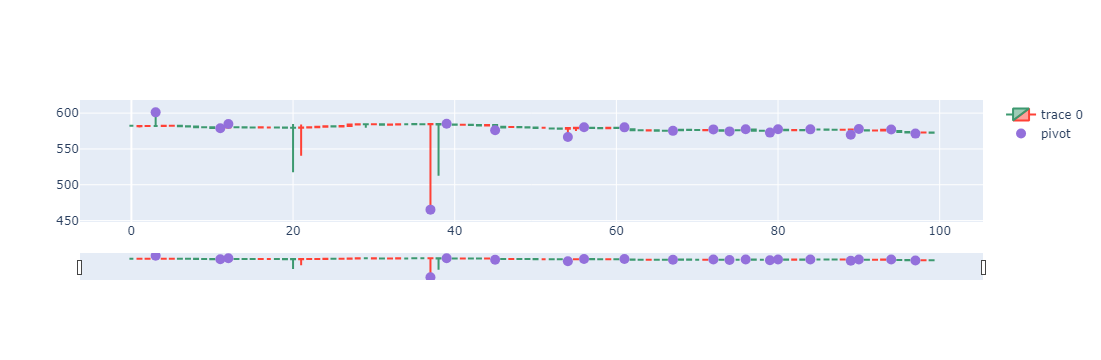

In [86]:
dfpl = df[0:100]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=10, color="MediumPurple"),
                name="pivot")
#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## Detect Price Channel

In [ ]:
def collect_channel(candle, backcandles, window):
    localdf = df[candle-backcandles-window:candle-window]
    localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name,window), axis=1)
    # highs = localdf.query("isPivot==1").High.values
    # idxhighs = localdf.query("isPivot==1").High.index
    # lows = localdf.query("isPivot==2").Low.values
    # idxlows = localdf.query("isPivot==2").Low.index
    highs = localdf[localdf['isPivot']==1].High.values
    idxhighs = localdf[localdf['isPivot']==1].High.index
    lows = localdf[localdf['isPivot']==2].Low.values
    idxlows = localdf[localdf['isPivot']==2].Low.index
    
    if len(lows)>=2 and len(highs)>=2:
        sl_lows, interc_lows, r_value_l, _, _ = stats.linregress(idxlows,lows)
        sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs,highs)

        return(sl_lows, interc_lows, sl_highs, interc_highs, r_value_l**2, r_value_h**2)
    else:
        return(0,0,0,0,0,0)
    

In [ ]:
candle = 53
backcandles = 40
window = 3

#dfpl = df[candle-backcandles-window-5:candle+200]

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")

sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = collect_channel(candle, backcandles, window)
print(r_sq_l, r_sq_h)
x = np.array(range(candle-backcandles-window, candle+1))
fig.add_trace(go.Scatter(x=x, y=sl_lows*x + interc_lows, mode='lines', name='lower slope'))
fig.add_trace(go.Scatter(x=x, y=sl_highs*x + interc_highs, mode='lines', name='max slope'))
#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## Detect Break Out

In [ ]:
def isBreakOut(candle, backcandles, window):
    if (candle-backcandles-window)<0:
        return 0
    
    sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = collect_channel(candle, 
                                                                                   backcandles, 
                                                                                   window)
    
    prev_idx = candle-1
    prev_high = df.iloc[candle-1].High
    prev_low = df.iloc[candle-1].Low
    prev_close = df.iloc[candle-1].Close
    
    curr_idx = candle
    curr_high = df.iloc[candle].High
    curr_low = df.iloc[candle].Low
    curr_close = df.iloc[candle].Close
    curr_open = df.iloc[candle].Open

    if ( prev_high > (sl_lows*prev_idx + interc_lows) and
        prev_close < (sl_lows*prev_idx + interc_lows) and
        curr_open < (sl_lows*curr_idx + interc_lows) and
        curr_close < (sl_lows*prev_idx + interc_lows)): #and r_sq_l > 0.9
        return 1
    
    elif ( prev_low < (sl_highs*prev_idx + interc_highs) and
        prev_close > (sl_highs*prev_idx + interc_highs) and
        curr_open > (sl_highs*curr_idx + interc_highs) and
        curr_close > (sl_highs*prev_idx + interc_highs)): #and r_sq_h > 0.9
        return 2
    
    else:
        return 0

In [ ]:
dfpl

In [ ]:
def breakpointpos(x):
    if x['isBreakOut']==2:
        return x['Low']-3e-3
    elif x['isBreakOut']==1:
        return x['High']+3e-3
    else:
        return np.nan

candle = 53
backcandles = 40
window = 3
dfpl = df[candle-backcandles-window-5:candle+20]
dfpl["isBreakOut"] = [isBreakOut(candle, backcandles, window) for candle in dfpl.index]
dfpl['breakpointpos'] = dfpl.apply(lambda row: breakpointpos(row), axis=1)

In [ ]:
candle = 53

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")

fig.add_scatter(x=dfpl.index, y=dfpl['breakpointpos'], mode="markers",
                marker=dict(size=8, color="Black"), marker_symbol="hexagram",
                name="Break Out")

sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = collect_channel(candle, backcandles, window)
print(r_sq_l, r_sq_h)
x = np.array(range(candle-backcandles-window, candle+1))
fig.add_trace(go.Scatter(x=x, y=sl_lows*x + interc_lows, mode='lines', name='lower slope'))
fig.add_trace(go.Scatter(x=x, y=sl_highs*x + interc_highs, mode='lines', name='max slope'))
#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()